# Ejemplo de apredizaje supervisado

Paso 1. Importar librerias

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/egrochos/DevNetCreate2019/master/titanic.csv')

In [3]:
data.shape

(891, 12)

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
cols_to_use = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']
data = data[cols_to_use]
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,male,22.0,1,0,7.2500,0
1,1,female,38.0,1,0,71.2833,1
2,3,female,26.0,0,0,7.9250,1
3,1,female,35.0,1,0,53.1000,1
4,3,male,35.0,0,0,8.0500,0


In [6]:
data.isna().values.any()

True

In [7]:
data = data.dropna()
data.shape

(714, 7)

## Modelo de Aprendizaje Simple

In [8]:
features = data[['Sex', 'Age', 'Fare']].copy()
labels = data['Survived']
features['Sex'] = data['Sex'].replace({'male':0,'female':1})
features.head()

,Sex,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, random_state = 13)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(535, 3)
(179, 3)
(535,)
(179,)


In [10]:
from sklearn.tree import DecisionTreeClassifier

DecisionTreeModel = DecisionTreeClassifier(max_depth = 3)
DecisionTreeModel.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [11]:
from sklearn.metrics import accuracy_score

y_predict = DecisionTreeModel.predict(X_test)
accuracy_score(y_test, y_predict)

0.7932960893854749

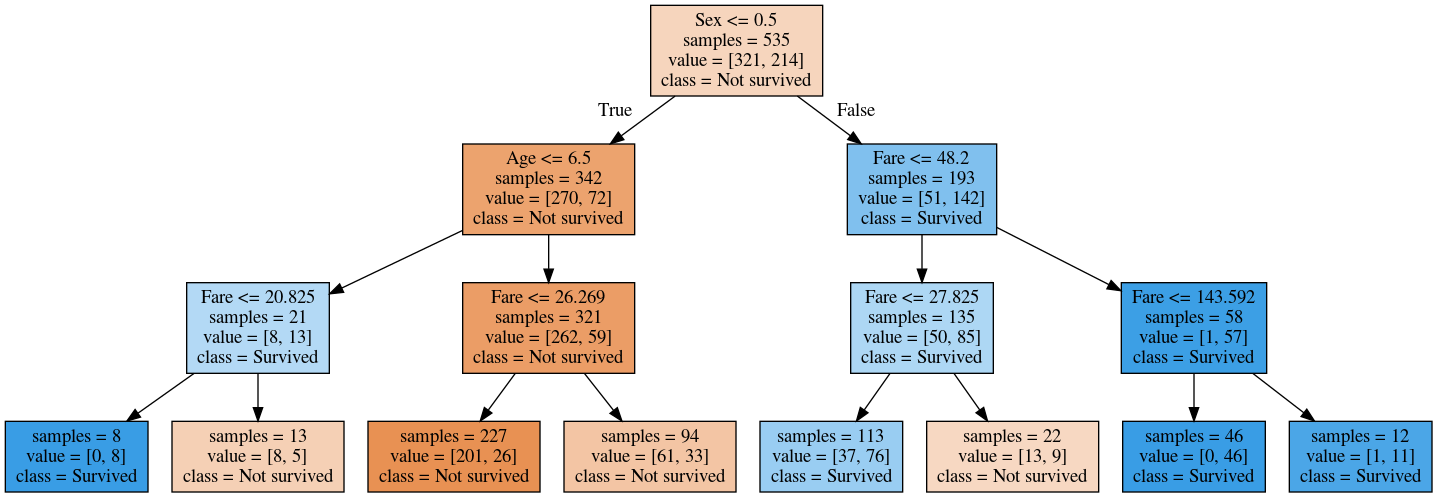

In [12]:
from sklearn.tree import export_graphviz
export_graphviz(DecisionTreeModel, out_file='simple_tree.dot', feature_names=features.columns,
                impurity=False, class_names=['Not survived', 'Survived'], filled=True)
from subprocess import call
call(['dot', '-T', 'png', 'simple_tree.dot', '-o', 'simple_tree.png'])

from IPython.display import Image
Image('simple_tree.png')

## Un modelo mas completo

In [13]:
features = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']].copy()
features['Sex'] = data['Sex'].replace({'male':0,'female':1})
features.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,3,1,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,3,0,35.0,0,0,8.0500


In [14]:
labels = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(features, labels, random_state = 13)

from sklearn.ensemble import RandomForestClassifier
RandomForestModel = RandomForestClassifier(min_samples_leaf = 3, min_samples_split = 20, 
                                          n_estimators = 500, max_depth = None)
RandomForestModel.fit(X_train, y_train)
y_predict = RandomForestModel.predict(X_test)
accuracy_score(y_test, y_predict)

0.8156424581005587

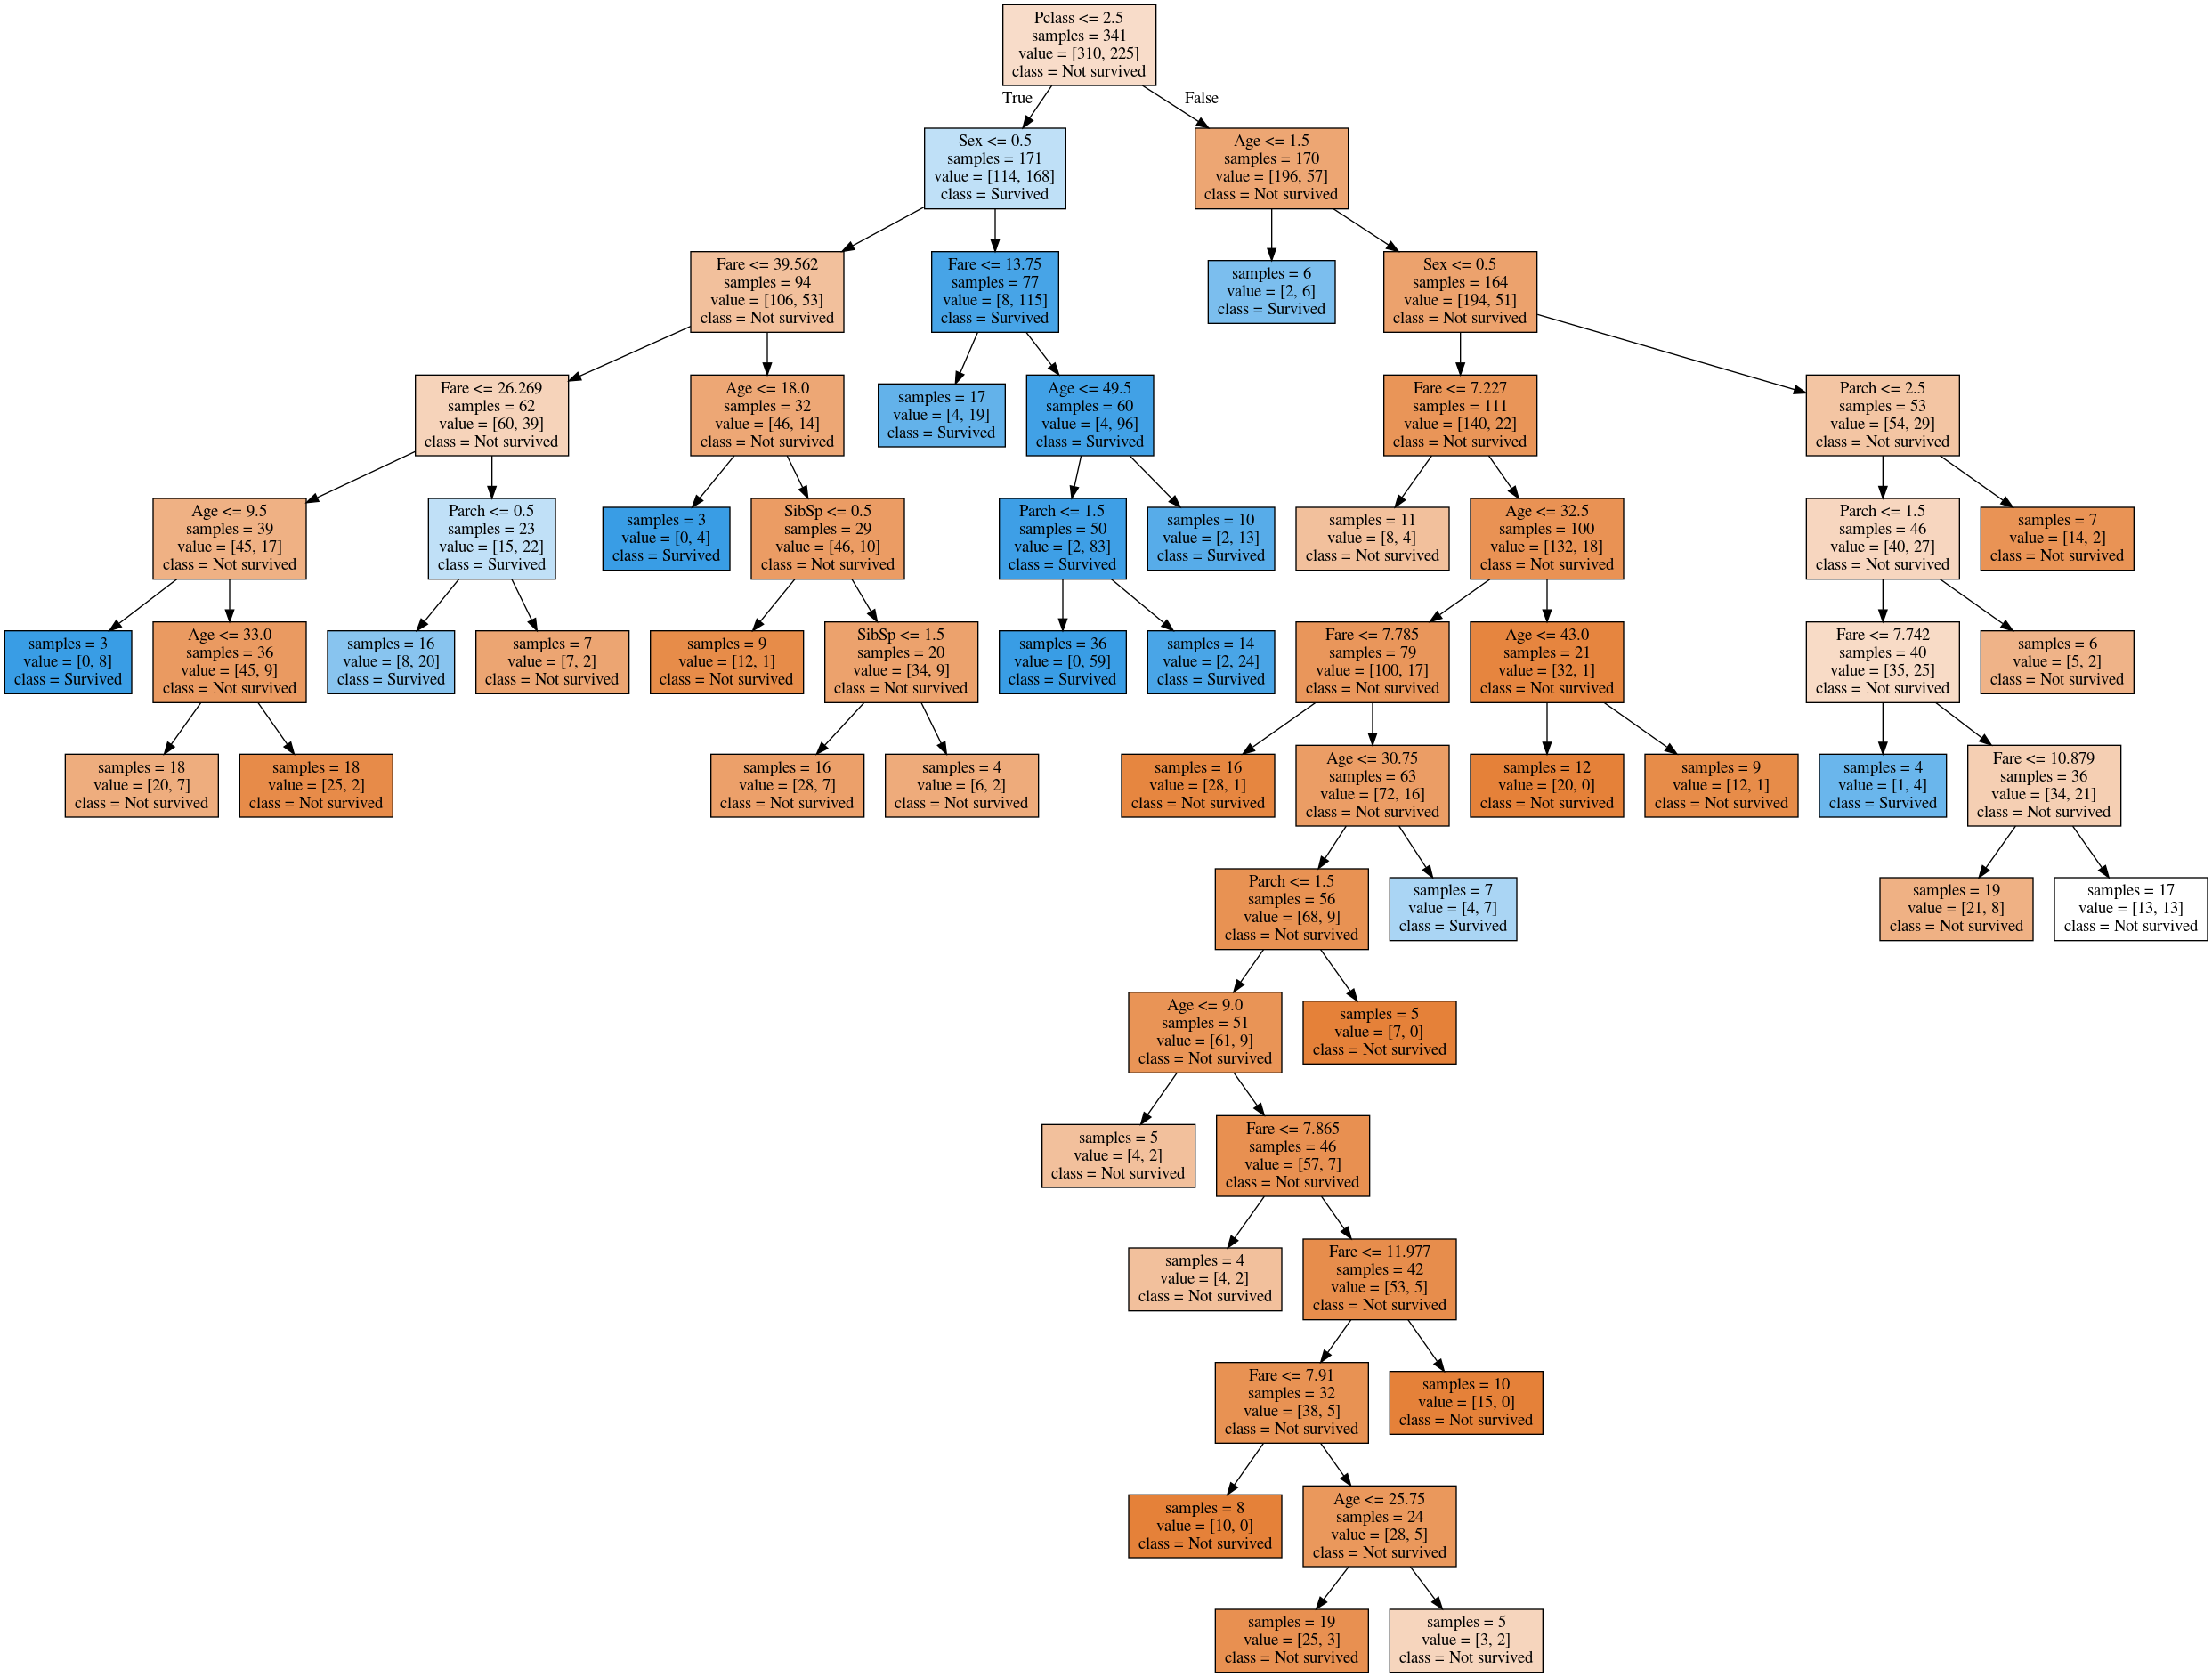

In [15]:
estimator = RandomForestModel.estimators_[0]
export_graphviz(estimator, out_file='complete_tree.dot', feature_names=features.columns,
                impurity=False, class_names=['Not survived', 'Survived'], filled=True)
call(['dot', '-T', 'png', 'complete_tree.dot', '-o', 'complete_tree.png'])
Image('complete_tree.png')

In [16]:
importances = pd.DataFrame({'feature' : X_train.columns, 'importance' : RandomForestModel.feature_importances_})
importances = importances.sort_values('importance', ascending = False).set_index('feature')
importances.head()

,importance
feature,
Sex,0.386731
Fare,0.204104
Pclass,0.179098
Age,0.162994
SibSp,0.035419


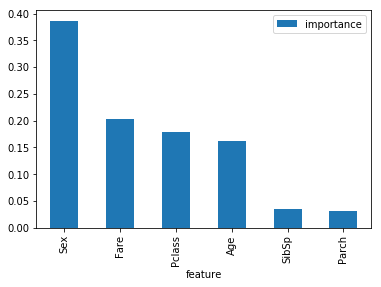

In [17]:
%matplotlib inline
importances.plot.bar()